# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


In [2]:
# Import API key
from api_keys import api_key

In [3]:
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set up url path as a string - City will be added to the query later 
url = 'http://api.openweathermap.org/data/2.5/weather?q='

In [7]:
# Establish varibales i.e. lists that will become the columns of the dataframe
names = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a count to track the number of cities I am looking at
count = 1

In [10]:
# Saving all config information - url is same as above
url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'metric'

In [24]:
# Trying to query just one city / show a response because I think I am out of API requests
query_url = f"{url}{city}&appid={api_key}&units={units}"
response = requests.get(query_url).json()
response

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [23]:
# Loop through all cities to collect responses of the data we need
# Append the data with the criteria from API Geo Coordinates response
for city in cities:
    query_url = f"{url}{city}&APPID={api_key}&units={units}"
    try:
        response = requests.get(query_url).json()
        names.append(response['name'])
    except:
        print("City Not Found")
    else:
        city_name = response['name']
        print(f'Processing record {count} | {city_name}')
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        count = count + 1


City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not F

City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create a City Weather dataframe
weather = {
    "City": names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

city_weather = pd.DataFrame(weather)
city_weather.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [15]:
# Conver the city weather into a csv
city_weather.to_csv('cities.csv')
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

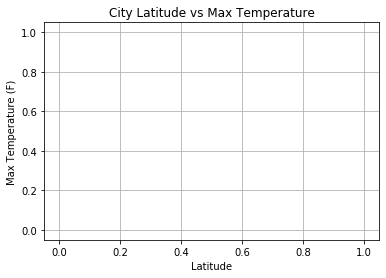

In [16]:
# Calculate the Temperature (F) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("temp-lat.png")

#### Latitude vs. Humidity Plot

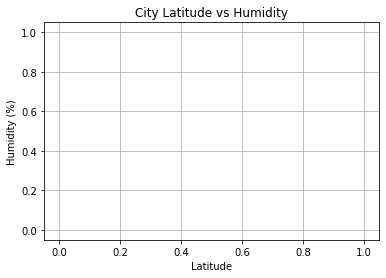

In [17]:
# Calculate the Humidity (%) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("humidity-lat.png")

#### Latitude vs. Cloudiness Plot

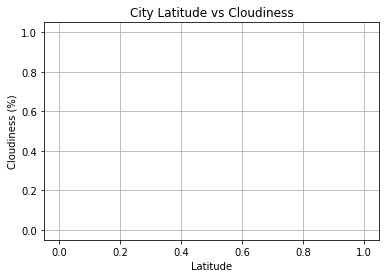

In [18]:
# Calculate the Cloudiness (%) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("cloudiness-lat.png")

#### Latitude vs. Wind Speed Plot

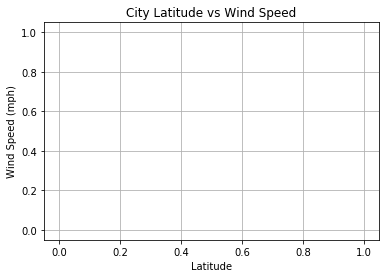

In [19]:
# Calculate the Wind Speed (MPH) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("windspeed-lat.png")